#                                     WHOLESALE DATA ANALYSIS

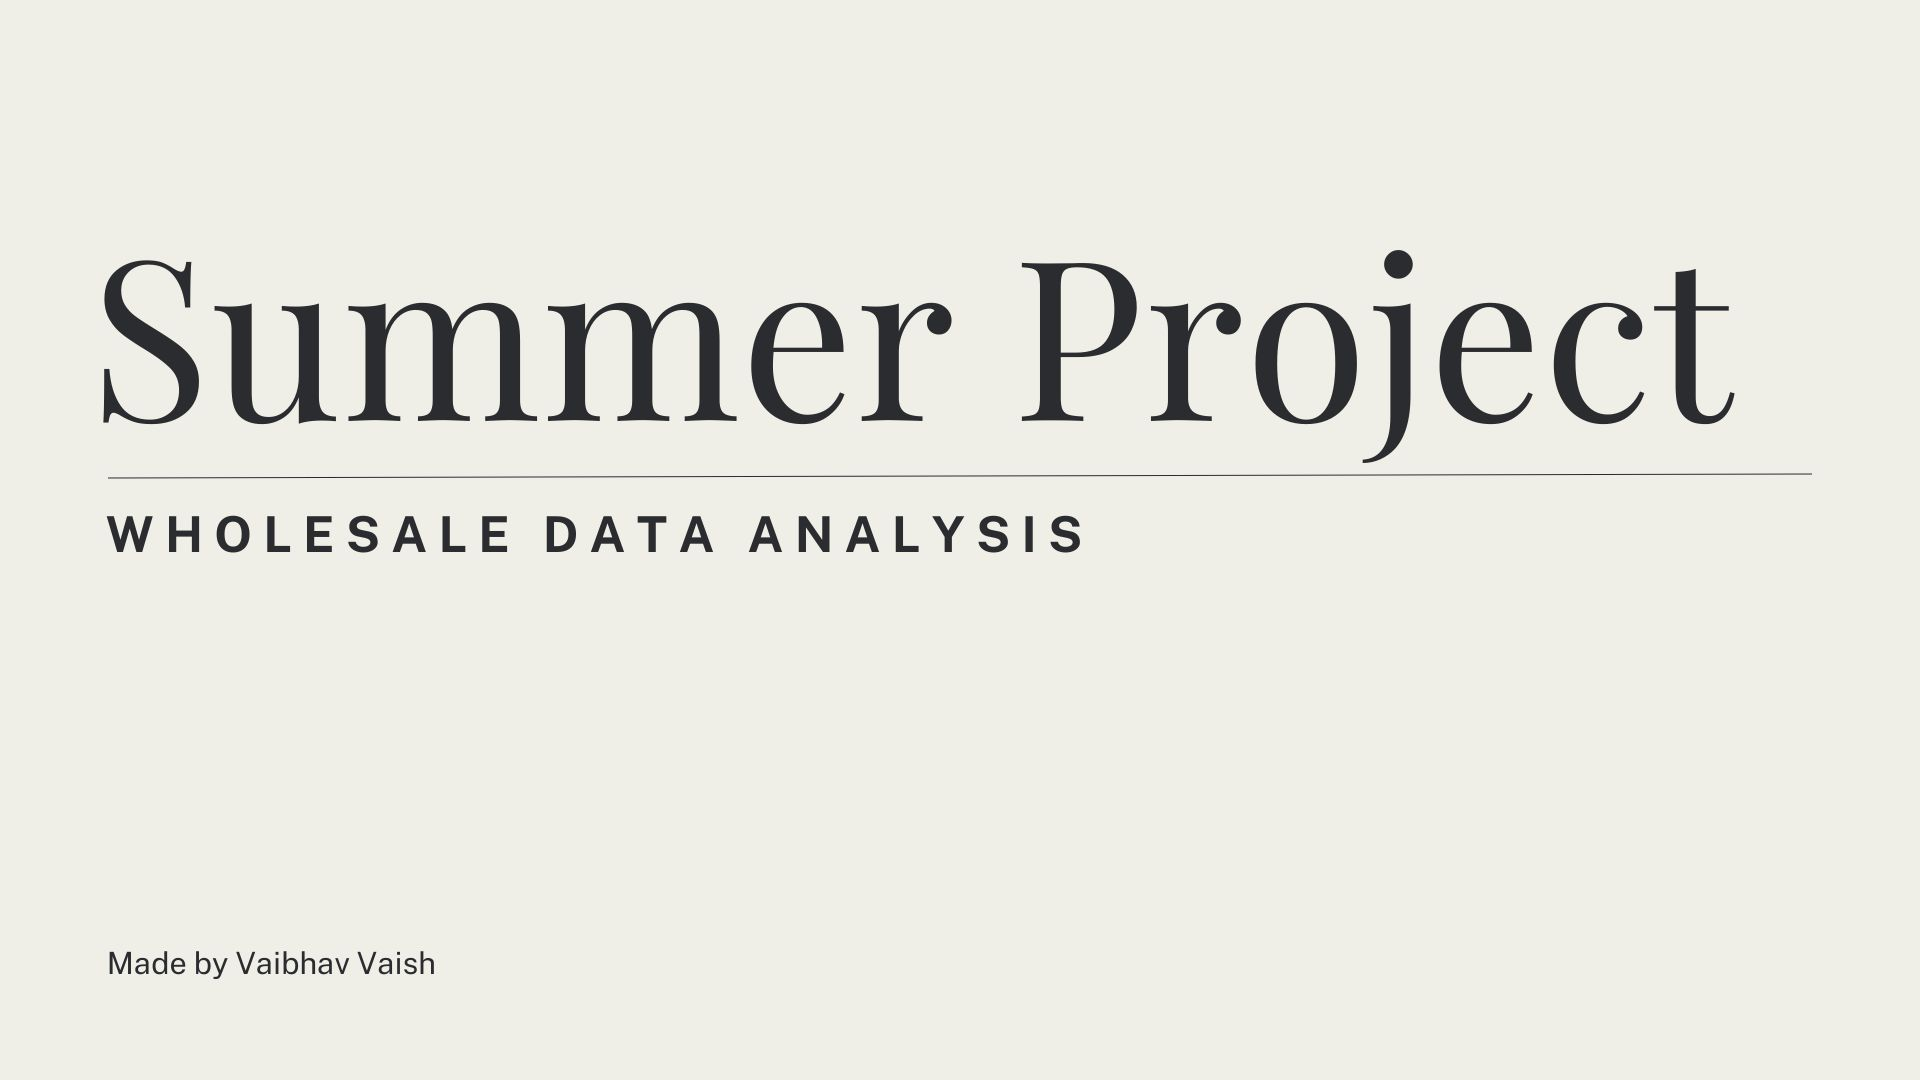

# INDEX

# List of Tables

# List of Figures

# Problem Statement / Objective

A wholesale distributor operating in different regions of Portugal has information about the annual spending of 440 large retailers on six different product varieties across three regions in Portugal (Lisbon, Oporto, and Other) and various sales channels (Hotel, Retail).

The dataset is provided by a wholesale distributor operating in different regions of Portugal. Here are the key features of the dataset:

- Number of Retailers: 440 large retailers
- Product Varieties: 6 different types
- Regions: Lisbon, Oporto, and Other
- Sales Channels: Hotel, Retail

This data can be used for various analyses, such as understanding spending patterns, identifying regional differences in product demand, and optimizing supply chain management for different sales channels.

# Data

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in 
their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different 
varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# Data Description

1.Buyer/Spender- ID's of customers

2.Region- Region of the distributor

3.Fresh- spending on Fresh Vegetables

4.Milk- spending on milk

5.Grocery- spending on grocery

6.Frozen- spending on frozen food

7.Detergents_paper- spending on detergents and toilet paper

8.Delicatessen- spending on instant food

# Importing the necessary Libraries

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset

In [16]:
df=pd.read_csv('C:\\My Project\\4-Wholesale Customer_New.csv')

# Basic Steps:

# 1. Display the top 5 rows

In [19]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


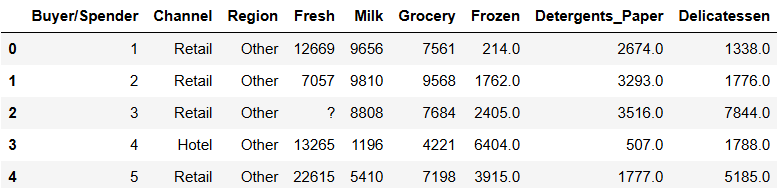

# Observations

On Column Fresh row number 2 there is a null value

# 2. Display the last 5 rows

In [24]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


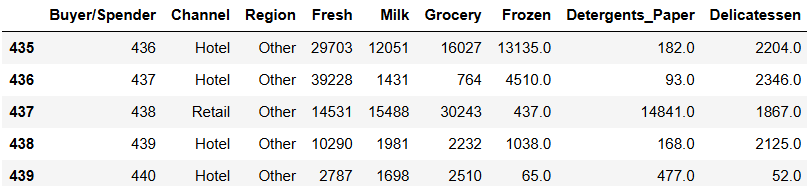

# Observation

# 3. Check the shape

In [29]:
df.shape

(440, 9)

# 4. Check the datatypes of each feature

In [31]:
df.dtypes

Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

In [32]:
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
78,79,Hotel,Other,?,1175,2067,2096.0,301.0,167.0


In [33]:
df["Fresh"]=df['Fresh'].replace('?',np.nan)

In [34]:
df['Fresh'] = df['Fresh'].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             438 non-null    float64
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


# Observations

Fresh should be in float as observed from the table.

# 5. Check the statistical summary

In [39]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Fresh,438.0,12016.01,12673.21,3.0,3111.25,8504.0,16935.25,112151.0
Milk,440.0,6035.78,8964.93,1.0,1525.25,3641.0,7217.50,112400.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,437.0,3085.64,4867.74,25.0,744.00,1535.0,3570.00,60869.0
Detergents_Paper,439.0,3773.75,19364.89,3.0,256.50,813.0,3956.00,396100.0
Delicatessen,438.0,1531.06,2825.04,3.0,411.25,971.0,1822.75,47943.0


## Observations
- Spending on the Detergents Paper is the highest
- On checking the median values (50%), it appears that retailers spend more on Fresh products and grocery as compared to others.
- 75% of 440 retailers spend only 1820 or less on Delicatessen. So annual spend of Delicatessen appears to be least among all.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             438 non-null    float64
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


## Observations

The data set contains 440 observations of data and 9 variables. Only Channel and Region are categorical while rest is numeric data. 

# 6. Check the null values

In [44]:
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               2
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

# 7. Check the duplicate values

In [46]:
df.duplicated().sum()

0

# 8. Checking for anomalies or wrong entries

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,438.0,12016.009132,12673.210863,3.0,3111.25,8504.0,16935.25,112151.0
Milk,440.0,6035.779545,8964.929649,1.0,1525.25,3641.0,7217.50,112400.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,437.0,3085.638444,4867.744145,25.0,744.00,1535.0,3570.00,60869.0
Detergents_Paper,439.0,3773.747153,19364.886053,3.0,256.50,813.0,3956.00,396100.0
Delicatessen,438.0,1531.057078,2825.044262,3.0,411.25,971.0,1822.75,47943.0


# 9. Check the outliers and their authenticity

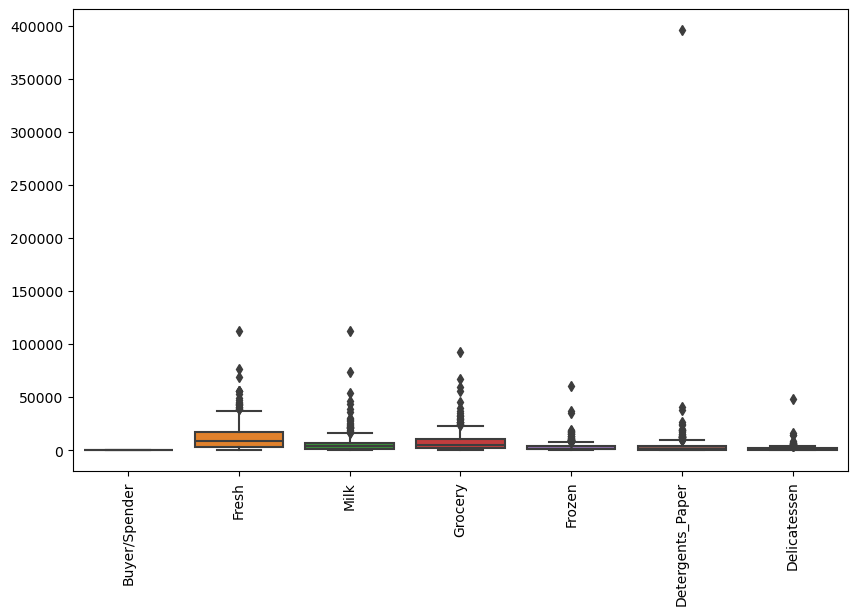

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


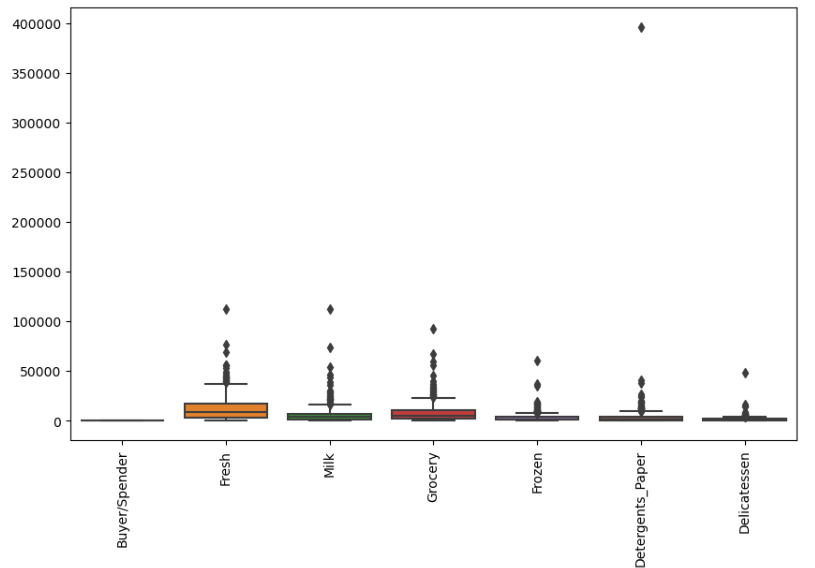

# 10.	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

#  Data cleaning steps

In [54]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Handling Null Values

In [56]:
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

In [57]:
#Convert all numeric columns to numeric and coerce errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [58]:
# Fill numeric columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [59]:
# Fill non-numeric columns with the most frequent value
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [77]:
# Treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])
        


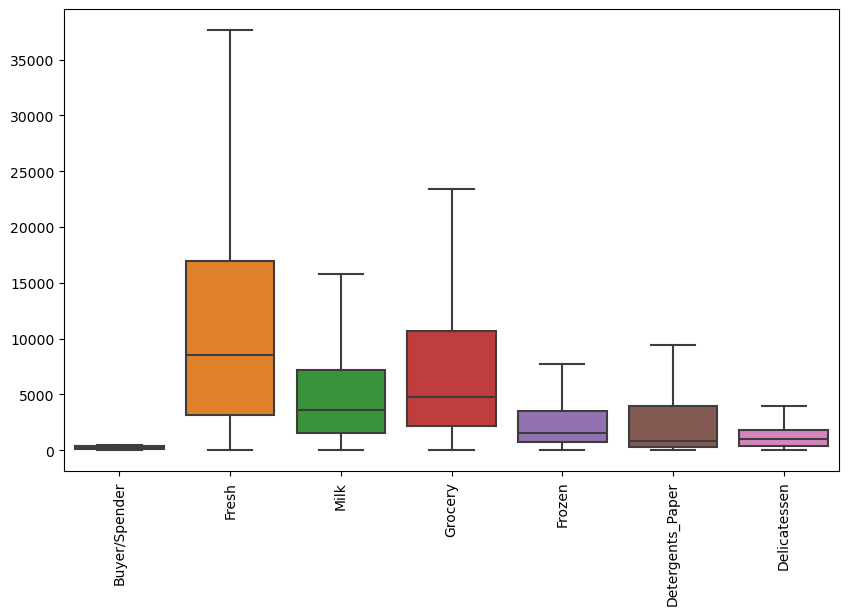

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# 1.	Spending Analysis

•	What is the total number of buyers in the dataset?

In [ ]:
print("Total number of buyers:", df_cleaned['Buyer/Spender'].nunique())

•What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [ ]:
# Only consider the numeric columns for average spending calculation
average_spending = df_cleaned[numeric_columns].mean()
print("Average spending on each category:")
print(average_spending)

•	Which category has the highest average spending?

In [ ]:
highest_avg_spending = average_spending.idxmax()
print("Category with the highest average spending:", highest_avg_spending)

•	How many buyers spend above the average on Fresh Vegetables?

In [ ]:
# Convert 'Fresh' column to numeric, handling errors
df_cleaned['Fresh'] = pd.to_numeric(df_cleaned['Fresh'], errors='coerce')

# Calculate average spending on Fresh Vegetables
avg_fresh_spending = df_cleaned['Fresh'].mean()

# Find buyers spending above average on Fresh Vegetables
buyers_above_avg_fresh = df_cleaned[df_cleaned['Fresh'] > avg_fresh_spending]
print("Number of buyers who spend above the average on Fresh Vegetables:", buyers_above_avg_fresh.shape[0])

# 2.	Regional Demand

•	What is the total spending in each region?

In [ ]:
total_spending_region = df_cleaned.groupby('Region').sum().T
print("Total spending in each region:")
total_spending_region

•	Which region has the highest spending on Milk?

In [ ]:
total_spending_region.loc['Milk']

•	How does the average spending on Grocery vary across different regions?

In [ ]:
avg_spending_grocery_region = df_cleaned.groupby('Region')['Grocery'].mean()
print("Average spending on Grocery across different regions:")
print(avg_spending_grocery_region)

•	Which region has the highest average spending per buyer?

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
avg_spending_per_buyer_region = df_cleaned.groupby('Region')[numeric_cols].mean().mean(axis=1)

highest_avg_spending_per_buyer_region = avg_spending_per_buyer_region.idxmax()
print("Region with the highest average spending per buyer:", highest_avg_spending_per_buyer_region)

# 3.	Category Preferences

•	What percentage of buyers spend more on Frozen food compared to Delicatessen?

In [ ]:
percent_frozen_over_deli = (df_cleaned['Frozen'] > df_cleaned['Delicatessen']).mean() * 100
print("Percentage of buyers who spend more on Frozen food compared to Delicatessen: {:.2f}%".format(percent_frozen_over_deli))

•	Which category shows the most variation in spending among buyers?

In [ ]:
most_variation_category = df_cleaned[numeric_columns].std().idxmax()
print("Category with the most variation in spending among buyers:", most_variation_category)

•	Are there any regions where spending on Detergents_paper is significantly higher than others?

In [ ]:
high_detergents_region = df_cleaned.groupby('Region')['Detergents_Paper'].mean().idxmax()
print("Region with significantly higher spending on Detergents_paper:", high_detergents_region)

•	What is the correlation between spending on Fresh and Frozen food?

In [ ]:
# Replace '?' with NaN (Not a Number)
df_cleaned.replace('?', np.nan, inplace=True)

# Convert columns to numeric
df_cleaned['Fresh'] = pd.to_numeric(df_cleaned['Fresh'])
df_cleaned['Frozen'] = pd.to_numeric(df_cleaned['Frozen'])

# Calculate correlation
correlation_fresh_frozen = df_cleaned['Fresh'].corr(df_cleaned['Frozen'])
print("Correlation between spending on Fresh and Frozen food:", correlation_fresh_frozen)

# 4.	Customer Segmentation

•	Can buyers be grouped into segments based on their spending patterns? (e.g., using clustering analysis)

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Separate numeric columns for clustering
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
df_cleaned[numeric_cols] = imputer.fit_transform(df_cleaned[numeric_cols])

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_cleaned[numeric_cols])

# Add cluster labels to the DataFrame
df_cleaned['Cluster'] = kmeans.labels_



In [ ]:
plt.figure(figsize= (10,3))
sns.boxplot(data=df, x='Buyer/Spender');

•	What are the characteristics of the top 10% spenders in each category?

In [ ]:
top_10_percent = df_cleaned[df_cleaned['Fresh'] >= df_cleaned['Fresh'].quantile(0.90)]
print("Characteristics of the top 10% spenders in Fresh category:")
top_10_percent.describe()

•	How do spending patterns differ between high spenders and low spenders?

In [ ]:
def define_high_low_spenders(df):
  # Calculate total spending per buyer
  df['Total_Spending'] = df[numeric_cols].sum(axis=1)

  # Define high and low spenders based on a threshold
  threshold = df['Total_Spending'].mean()
  df['Spending_Category'] = ['High Spender' if x > threshold else 'Low Spender' for x in df['Total_Spending']]

  return df

# Define high and low spenders
df_cleaned = define_high_low_spenders(df_cleaned)

# Analyze spending patterns for each category
for category in numeric_cols:
  high_spenders = df_cleaned[df_cleaned['Spending_Category'] == 'High Spender'][category]
  low_spenders = df_cleaned[df_cleaned['Spending_Category'] == 'Low Spender'][category]

  print(f"Spending on {category}:")
  print("High Spenders:")
  print(f"Mean: {high_spenders.mean():.2f}, Standard deviation: {high_spenders.std():.2f}")
  print("Low Spenders:")
  print(f"Mean: {low_spenders.mean():.2f}, Standard deviation: {low_spenders.std():.2f}")
  print()

# Visualize spending patterns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Spending_Category', y='Total_Spending')
plt.title('Total Spending by High and Low Spenders')
plt.show()


# 5.	Cross-Category Analysis

•	Is there a correlation between spending on Milk and Grocery?

In [ ]:
correlation_milk_grocery = df_cleaned['Milk'].corr(df_cleaned['Grocery'])
print("Correlation between spending on Milk and Grocery:", correlation_milk_grocery)

•	Do buyers who spend more on Delicatessen also spend more on Frozen food?

In [ ]:
buyers_high_deli_frozen = df_cleaned[(df_cleaned['Delicatessen'] > df_cleaned['Delicatessen'].mean()) & 
                                     (df_cleaned['Frozen'] > df_cleaned['Frozen'].mean())]
print("Number of buyers who spend more on Delicatessen and Frozen food:", buyers_high_deli_frozen.shape[0])

•	What is the combined average spending on Fresh and Milk for each region?

In [ ]:
combined_avg_spending_fresh_milk_region = df_cleaned.groupby('Region')[['Fresh', 'Milk']].mean().sum(axis=1)
print("Combined average spending on Fresh and Milk for each region:")
print(combined_avg_spending_fresh_milk_region)

# 6.	Demand Trends

•	Which region has the fastest growing spending on Fresh Vegetables?

In [ ]:
# Calculate the growth rate for Fresh Vegetables spending in each region
growth_rate_fresh_region = df_cleaned.groupby('Region')['Fresh'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

# Identify the region with the fastest growth rate
fastest_growing_region_fresh = growth_rate_fresh_region.idxmax()

# Print the result
print("Region with the fastest growing spending on Fresh Vegetables:", fastest_growing_region_fresh)

•	How does the total spending on Grocery change across regions over time (if time data is available)?

In [ ]:
if 'Time' in df_cleaned.columns:
  # Group data by region and time
  grouped_data = df_cleaned.groupby(['Region', 'Time'])['Grocery'].sum().unstack()

  # Plot the total spending on Grocery for each region over time
  plt.figure(figsize=(10, 6))
  grouped_data.plot(kind='line')
  plt.title('Total Spending on Grocery by Region over Time')
  plt.xlabel('Time')
  plt.ylabel('Total Spending')
  plt.show()

else:
  print("Time data is not available in the provided dataset.")

•	What is the average spending per buyer in each category over a specified time period (if time data is available)?

In [ ]:
if 'Time' in df_cleaned.columns:
  # Calculate the average spending per buyer in each category for each time period
  avg_spending_per_buyer_time = df_cleaned.groupby(['Time'])[numeric_cols].mean().div(df_cleaned.groupby(['Time'])['Buyer/Spender'].nunique(), axis=0)

  # Select the desired time period
  selected_time_period = '2012-Q1'  # Replace with your desired time period

  # Print the average spending per buyer in each category for the selected time period
  print(f"Average spending per buyer in each category in {selected_time_period}:")
  print(avg_spending_per_buyer_time.loc[selected_time_period])

else:
  print("Time data is not available in the provided dataset.")

# 7.	Buyer Insights

•	What is the repeat purchase rate for buyers who spend above the average in at least three categories?

In [ ]:
buyers_above_avg_three_cat = df_cleaned[
    (df_cleaned['Fresh'] > df_cleaned['Fresh'].mean()) & 
    (df_cleaned['Milk'] > df_cleaned['Milk'].mean()) & 
    (df_cleaned['Grocery'] > df_cleaned['Grocery'].mean())
]
print("Number of buyers who spend above the average in at least three categories:", buyers_above_avg_three_cat.shape[0])

•	How many buyers spend consistently (i.e., similar amounts) across all categories?

In [ ]:
def is_consistent_spender(df, threshold):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    variances = df[numeric_cols].var(axis=1)
    # Return a boolean mask instead of a single boolean value
    return variances.lt(threshold)

consistent_buyers = df_cleaned[is_consistent_spender(df_cleaned, 100)]
print("Number of buyers who spend consistently across all categories:", consistent_buyers.shape[0])

•	Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?

In [ ]:
# Calculate variance in spending across categories for each region
spending_variance_region = df_cleaned.groupby('Region')[numeric_cols].var().sum(axis=1)

# Identify the region with the highest variance
most_diverse_region = spending_variance_region.idxmax()

# Print the result
print("Region with the most diverse spending patterns:", most_diverse_region)
